In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

np.random.seed(42)

Shape of dataset: (1000, 1000)
Labels shape: (1000,)


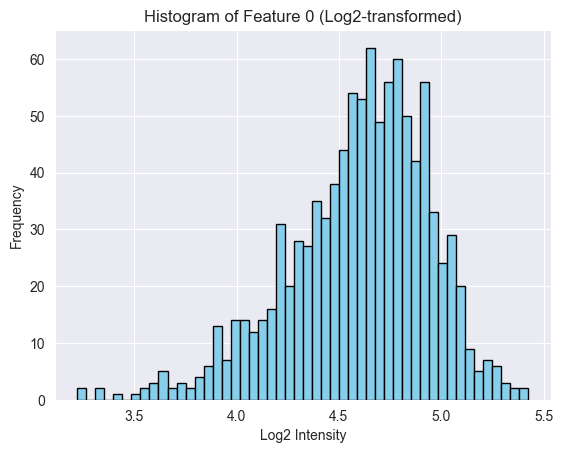

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt

# Parameters
n_samples = 1000
n_informative = 100
n_collinear = 200
n_noise = 700
n_features = n_informative + n_collinear + n_noise  # Total features
random_state = 42

# Step 1: Create base informative data
X_informative, y = make_classification(
    n_samples=n_samples,
    n_features=n_informative,
    n_informative=n_informative,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    shuffle=False,
    random_state=random_state
)

# Step 2: Create collinear (highly correlated) features
rng = np.random.default_rng(random_state)
collinear_noise = rng.normal(loc=0.0, scale=0.05, size=(n_samples, n_collinear))  # small noise
informative_indices = rng.choice(n_informative, size=n_collinear, replace=True)
X_collinear = X_informative[:, informative_indices] + collinear_noise

# Step 3: Create random noise features (unrelated to y)
X_noise = rng.normal(loc=0.0, scale=1.0, size=(n_samples, n_noise))

# Step 4: Concatenate all features
X = np.hstack([X_informative, X_collinear, X_noise])

# Step 5: Apply log2-normal transformation
# Shift data to be strictly positive before applying log2
X_shifted = X - X.min() + 1e-3  # ensure positive values
X_log2 = np.log2(X_shifted)

# Optional: Check basic stats
print(f"Shape of dataset: {X_log2.shape}")
print(f"Labels shape: {y.shape}")

# Example: plot histogram of a random feature
plt.hist(X_log2[:, 0], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Feature 0 (Log2-transformed)')
plt.xlabel('Log2 Intensity')
plt.ylabel('Frequency')
plt.show()
